<a href="https://colab.research.google.com/github/hvbilla/Python-Deep-Learning-/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64
Identifying nulls                                   Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
TENURE                                     0
PURCHASES_FREQUENCY                        0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
ONEOFF_PURCHASES_FREQUENCY                 0
PRC_FULL_PAYMENT                           0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
PAYMENTS                                   0
CUST_ID                

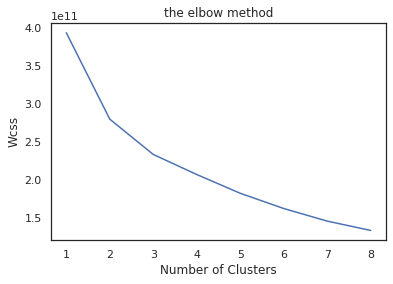

In [0]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
# import warnings
# warnings.filterwarnings("ignore")

dataset = pd.read_csv('CC.csv')

print(dataset.dtypes)

# # splitting the features and class
# x = dataset.iloc[:,[2, -5,-6]]
x = dataset

# see how many samples we have of each species
print(dataset["TENURE"].value_counts())

## Printing the count of Null values
nulls = pd.DataFrame(x.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print("Identifying nulls",nulls)

## Replacing null values with mean values
x = x.select_dtypes(include=[np.number]).interpolate().dropna()

## Verifying Null values after replacing it with the mean value
nulls = pd.DataFrame(x.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print("After Null Replaceing with Mean value:",nulls)


# Building the k-means algorithm
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("Silhoutte Score: " + str(score))

# elbow method to know the number of clusters
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    y_cluster_kmeans2 = km.predict(x)
   
       
plt.plot(range(1,9),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

# New Section